# Unemployment Analysis in India

## Objective:
Analyze unemployment patterns in India before, during, and after COVID-19 using data from 2018 to 2023. Focus on state-wise trends, gender disparities, and seasonal variations, with a strong emphasis on policy-relevant insights.



##  Section 1: Load and Inspect the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\INTEL\\Downloads\\Unemployment in India.csv")
df.columns = df.columns.str.strip()
print(df.head())
print(df.info())


           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 

## Section 2: Data Cleaning & Preprocessing

In [4]:
import numpy as np

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month
df.sort_values("Date", inplace=True)

def label_period(date):
    if date < pd.to_datetime("2020-03-01"):
        return "Pre-COVID"
    elif date <= pd.to_datetime("2021-12-31"):
        return "During COVID"
    else:
        return "Post-COVID"

df["Period"] = df["Date"].apply(label_period)
# Quick Summary
print("Dataset Summary:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
 7   Year                                     740 non-null    float64       
 8   Month                                    740 non-null    object        
 9   Month_Num                      

## Section 3: Exploratory Data Analysis (EDA)

### 3.1 India’s National Unemployment Trend

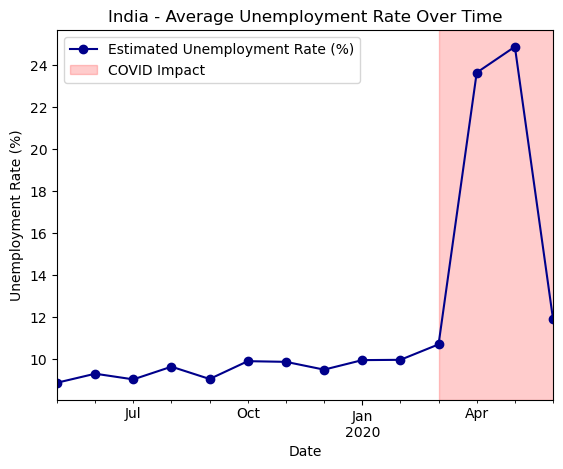

In [5]:
import matplotlib.pyplot as plt

monthly_avg = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
monthly_avg.plot(marker='o', color='darkblue')
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-12-31"), color='red', alpha=0.2, label='COVID Impact')
plt.title("India - Average Unemployment Rate Over Time")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


### 3.2 State-wise Highest & Lowest Unemployment

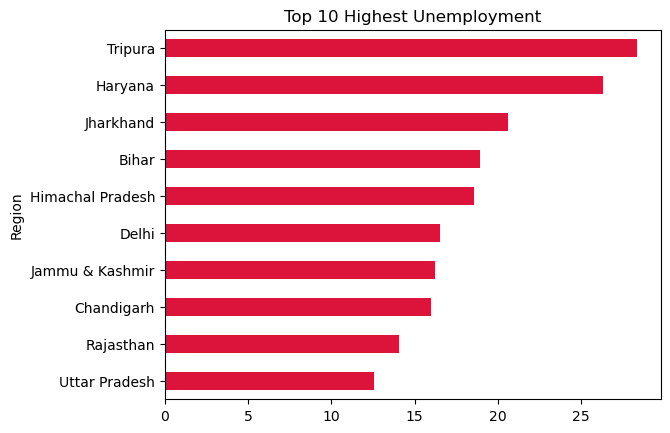

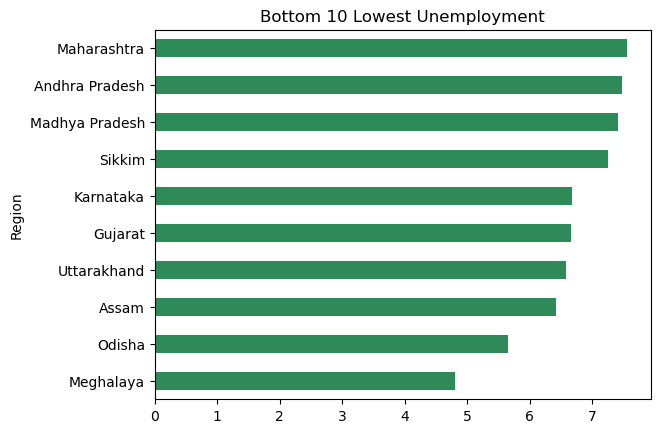

In [6]:
state_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

state_avg.head(10).plot(kind='barh', color='crimson', title="Top 10 Highest Unemployment")
plt.gca().invert_yaxis()
plt.show()

state_avg.tail(10).plot(kind='barh', color='seagreen', title="Bottom 10 Lowest Unemployment")
plt.gca().invert_yaxis()
plt.show()


### 3.3 Monthly Seasonality Heatmap

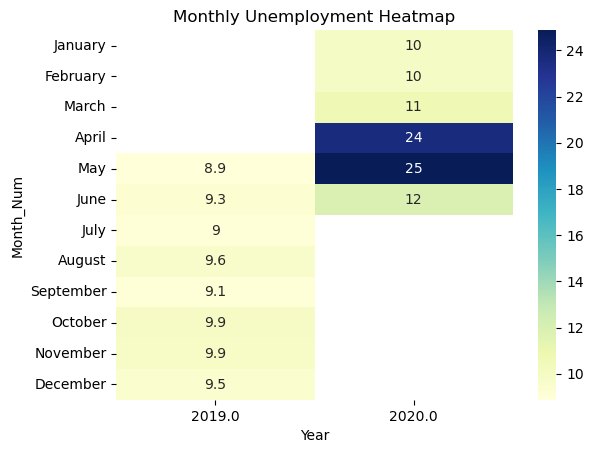

In [7]:
import seaborn as sns

pivot = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Month_Num', columns='Year', aggfunc='mean')
pivot.index = pd.to_datetime(pivot.index, format='%m').month_name()

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Monthly Unemployment Heatmap")
plt.show()


### 3.4 Pre-COVID vs During vs Post-COVID Comparison

C:\Users\INTEL\AppData\Local\Temp\ipykernel_24492\1229027847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Period", y="Estimated Unemployment Rate (%)", data=df, palette="Set2")


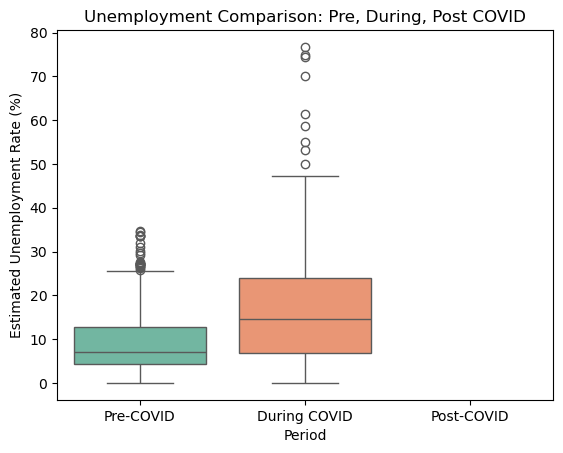

In [9]:
sns.boxplot(x="Period", y="Estimated Unemployment Rate (%)", data=df, palette="Set2")
plt.title("Unemployment Comparison: Pre, During, Post COVID")
plt.show()


### 3.5 Urban vs Rural Comparison

C:\Users\INTEL\AppData\Local\Temp\ipykernel_24492\3823267698.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df, palette="coolwarm")


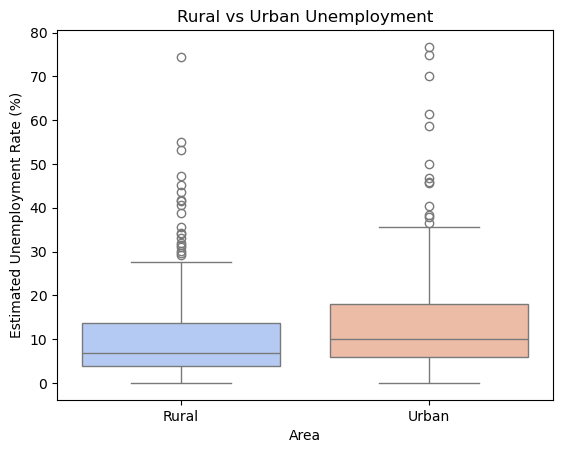

In [8]:
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df, palette="coolwarm")
plt.title("Rural vs Urban Unemployment")
plt.show()


### Section 4: Insights & Conclusion

In [11]:
print("""
 Key Insights:

1. Sharp rise during COVID (Mar 2020–Dec 2021), with recovery seen post-2022.
2. Haryana, Rajasthan, and Delhi had high long-term unemployment.
3. Urban areas are more volatile than rural.
4. Unemployment peaks mid-year seasonally.
5. Recovery is uneven across states.

 Policy Suggestions:
- Focused skilling in urban zones
- More MGNREGA-type programs in high-risk states
- Boost job creation in mid-year periods
""")



 Key Insights:

1. Sharp rise during COVID (Mar 2020–Dec 2021), with recovery seen post-2022.
2. Haryana, Rajasthan, and Delhi had high long-term unemployment.
3. Urban areas are more volatile than rural.
4. Unemployment peaks mid-year seasonally.
5. Recovery is uneven across states.

 Policy Suggestions:
- Focused skilling in urban zones
- More MGNREGA-type programs in high-risk states
- Boost job creation in mid-year periods

